In [12]:
# Youssef Abbas 20031269

import pickle  # for loading CIFAR-10 dataset batches
import numpy as np
import matplotlib.pyplot as plt  # for visualizing data
from tensorflow.keras.utils import to_categorical  
from tensorflow.keras.models import Sequential  # for building the CNN model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # CNN layers


In [13]:
def load_cifar_batch(file): # function to load single batch from dataset
    with open(file, 'rb') as f:  # open the batch file in binary mode
        batch = pickle.load(f, encoding='bytes')  # load the data using pickle
    data = batch[b'data']  # extract image data
    labels = batch[b'labels']  # extract labels
    data = data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)  # reshape and transpose for proper format
    return data, labels  # return data and labels

def load_cifar10(data_dir): # function to load all training and testing batches from CIFAR-10 dataset
    train_data, train_labels = [], []  # Initialize lists for training data and labels
    for i in range(1, 6):  # loop through all five training batches
        data, labels = load_cifar_batch(f"{data_dir}\\data_batch_{i}")  # load each batch
        train_data.append(data)  # append data to the list
        train_labels += labels  # append labels to the list
    train_data = np.concatenate(train_data)  # combine all training data into one single array
    test_data, test_labels = load_cifar_batch(f"{data_dir}\\test_batch")  # load test batch
    return (train_data, np.array(train_labels)), (test_data, np.array(test_labels))  # return training and test data


In [14]:
# specify the path to the CIFAR-10 dataset
data_dir = r"C:\Users\cdc\Desktop\Uni\Level 6\Semester A\Advanced AI\Computer Vision\cifar-10-batches-py"

# load  the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = load_cifar10(data_dir)

# normalizing pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0  # normalizing training data
x_test = x_test.astype('float32') / 255.0  # normalizing test data

# one-hot encode the labels for classification
y_train = to_categorical(y_train, 10)  # convert training labels to one-hot encoding
y_test = to_categorical(y_test, 10)  # convert test labels to one-hot encoding


In [15]:
# display the shapes of training and testing data
print("Training data shape:", x_train.shape)  # shape of training data
print("Training labels shape:", y_train.shape)  # shape of training labels
print("Testing data shape:", x_test.shape)  # shape of testing data
print("Testing labels shape:", y_test.shape)  # shape of testing labels


Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 10)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 10)


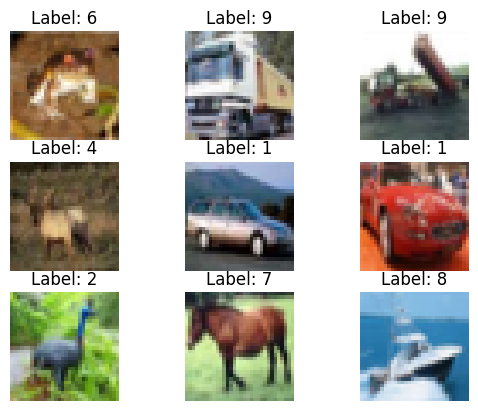

In [16]:
# visualize a few samples with their labels
for i in range(9):  # loop to display 9 images
    plt.subplot(3, 3, i+1)  # create a 3x3 grid of subplots
    plt.imshow(x_train[i])  # display ith training image
    plt.title(f"Label: {np.argmax(y_train[i])}")  # displaying label of the image
    plt.axis('off')  # turn off axis
plt.show()  # show plot


In [17]:
# building the CNN model
model = Sequential()  # initialize the sequential model

# add first convolutional layer with max-pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))  # convolutional layer
model.add(MaxPooling2D((2, 2)))  # max pooling layer

# add a second convolutional layer with max pooling
model.add(Conv2D(64, (3, 3), activation='relu'))  # convolutional layer
model.add(MaxPooling2D((2, 2)))  # max pooling layer

# flatten the feature maps and add dense layers
model.add(Flatten())  # flatten the 2 dimensional (2D) feature maps into a 1D vector
model.add(Dense(128, activation='relu'))  # fully connect layer with 128 units
model.add(Dropout(0.5))  # dropout layer for regularization
model.add(Dense(10, activation='softmax'))  # output layer for 10 classes


In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # compiling the model with Adam optimizer and categorical crossentropy loss


In [19]:
model.summary() # displaying the architecture of the model


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2) # training the model on the training data


Epoch 1/10
625/625 [==============================] - 11s 17ms/step - loss: 1.6984 - accuracy: 0.3747 - val_loss: 1.3555 - val_accuracy: 0.5221
Epoch 2/10
625/625 [==============================] - 10s 16ms/step - loss: 1.3874 - accuracy: 0.5015 - val_loss: 1.2267 - val_accuracy: 0.5617
Epoch 3/10
625/625 [==============================] - 10s 17ms/step - loss: 1.2609 - accuracy: 0.5498 - val_loss: 1.1079 - val_accuracy: 0.6102
Epoch 4/10
625/625 [==============================] - 10s 17ms/step - loss: 1.1785 - accuracy: 0.5828 - val_loss: 1.0617 - val_accuracy: 0.6271
Epoch 5/10
625/625 [==============================] - 10s 17ms/step - loss: 1.1146 - accuracy: 0.6058 - val_loss: 1.0024 - val_accuracy: 0.6475
Epoch 6/10
625/625 [==============================] - 10s 16ms/step - loss: 1.0574 - accuracy: 0.6282 - val_loss: 1.0001 - val_accuracy: 0.6521
Epoch 7/10
327/625 [==============>...............] - ETA: 4s - loss: 1.0131 - accuracy: 0.6463 

In [ ]:
model.save('cifar10_cnn_model.h5') ## save the trained model to a file


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test) # evaluate the model on the test data
print(f"Test Accuracy: {test_acc * 100:.2f}%")  # Print the test accuracy


In [ ]:
# plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')  # plot training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # plot validation accuracy
plt.xlabel('Epochs')  # Label the x-axis
plt.ylabel('Accuracy')  # Label the y-axis
plt.legend()  # add legend
plt.show()  # show plot

# plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')  # plot training loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # plot validation loss
plt.xlabel('Epochs')  # Label x-axis
plt.ylabel('Loss')  # label y-axis
plt.legend()  # add legend
plt.show()  # show plot
